### Step 0: Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("diamonds.csv", index_col=0)

### Step 1: Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


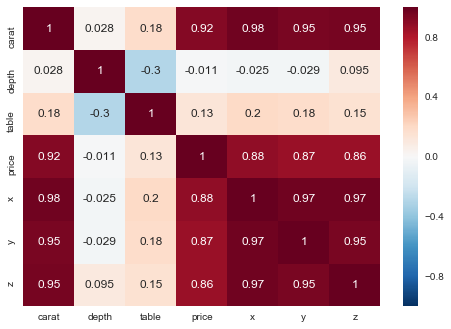

In [7]:
# Heatmap to see feature correlations with price
sns.heatmap(df.corr(), annot=True)

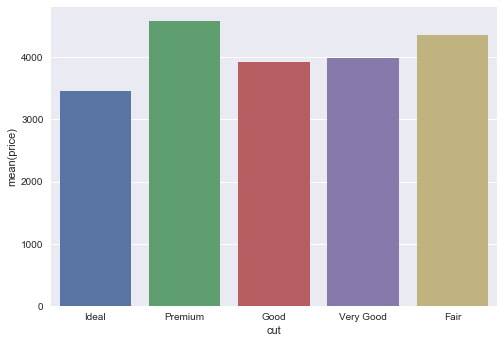

In [8]:
# Barplot of price vs cut
sns.barplot(x='cut',y='price', data=df, ci=None)

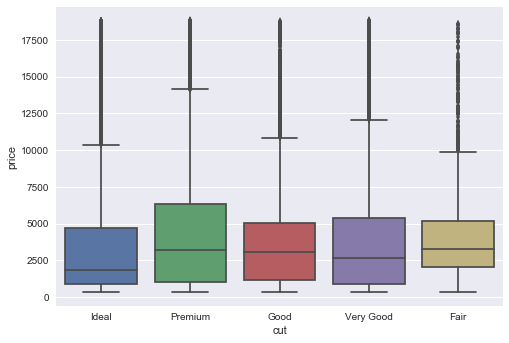

In [9]:
# Boxplot of price vs cut
sns.boxplot(x='cut',y='price', data=df)

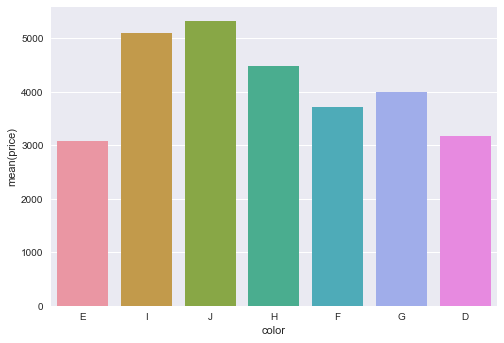

In [10]:
# Barplot of price vs color
sns.barplot(x='color',y='price', data=df, ci=None)

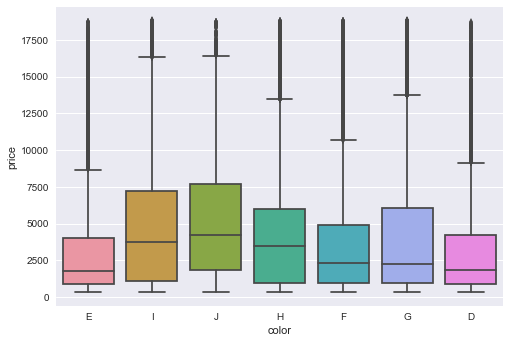

In [11]:
# Boxplot of price vs color
sns.boxplot(x='color',y='price', data=df)

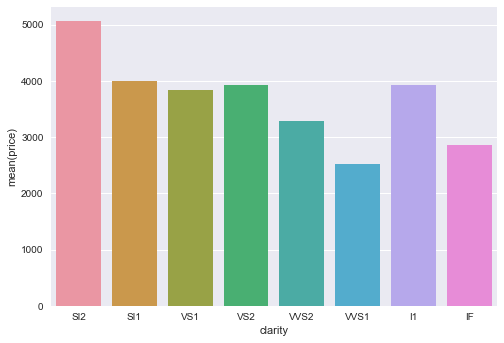

In [12]:
# Barplot of price vs clarity
sns.barplot(x='clarity',y='price', data=df, ci=None)

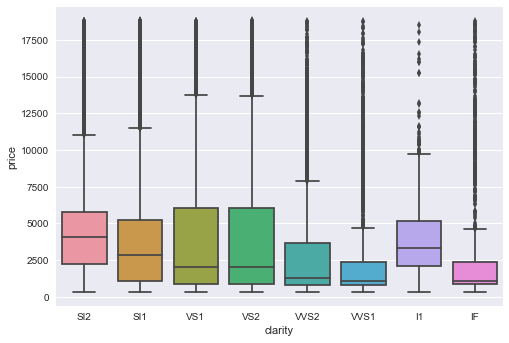

In [13]:
# Boxplot of price vs clarity
sns.boxplot(x='clarity',y='price', data=df)

#### Initial Thoughts

1. carat - the heatmap shows a very strong correlation with price
2. cut - the bar and boxplots don't show a significant relationship between cut and price   
3. color - the bar and boxplots show that some colors demand a higher price than others 
4. clarity - the bar and boxplots show that SII2 fetches a higher price than others
5. depth - from heatmap, does not have much correlation with price, which is surprising to me
6. table - from heatmap does not have much correlation with price
7. price - the price of the diamond which will be the label
8. x - length mm - strong correlation with price 
9. y - width mm - strong correlation with price
10. z - depth mm - strong correlation with price

### Step 2: Cleaning the Data

In [14]:
print((df.x==0).sum())
print((df.y==0).sum())
print((df.z==0).sum())

8
7
20


It was noticed from df.describe() that the minimum values of x, y and z are 0, which is not possible. There are 8+7+20 values in total, which is very little compared to the 50,000+ row dataset, so it should be okay to drop these rows in the steps below.

In [15]:
df[['x','y','z']]=df[['x','y','z']].replace(0,np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53932 non-null float64
y          53933 non-null float64
z          53920 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 7.0+ MB


In [16]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 1 to 53940
Data columns (total 10 columns):
carat      53920 non-null float64
cut        53920 non-null object
color      53920 non-null object
clarity    53920 non-null object
depth      53920 non-null float64
table      53920 non-null float64
price      53920 non-null int64
x          53920 non-null float64
y          53920 non-null float64
z          53920 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


As scikit-learn does not accept categorical features by default, we will encode the categorical features numerically by using the pandas get_dummies() method.

In [17]:
df_dummies = pd.get_dummies(df)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 1 to 53940
Data columns (total 27 columns):
carat            53920 non-null float64
depth            53920 non-null float64
table            53920 non-null float64
price            53920 non-null int64
x                53920 non-null float64
y                53920 non-null float64
z                53920 non-null float64
cut_Fair         53920 non-null uint8
cut_Good         53920 non-null uint8
cut_Ideal        53920 non-null uint8
cut_Premium      53920 non-null uint8
cut_Very Good    53920 non-null uint8
color_D          53920 non-null uint8
color_E          53920 non-null uint8
color_F          53920 non-null uint8
color_G          53920 non-null uint8
color_H          53920 non-null uint8
color_I          53920 non-null uint8
color_J          53920 non-null uint8
clarity_I1       53920 non-null uint8
clarity_IF       53920 non-null uint8
clarity_SI1      53920 non-null uint8
clarity_SI2      53920 non-null uint8
clari

We can drop 3 redundant 'dummy' columns here. For example for "cut", we can remove "cut_Fair". Why: a diamond that does not fulfil any of the other remaining cuts has to be "cut_Fair".

In [18]:
df_dummies = df_dummies.drop(['cut_Fair','color_D','clarity_I1'], axis = 1)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 1 to 53940
Data columns (total 24 columns):
carat            53920 non-null float64
depth            53920 non-null float64
table            53920 non-null float64
price            53920 non-null int64
x                53920 non-null float64
y                53920 non-null float64
z                53920 non-null float64
cut_Good         53920 non-null uint8
cut_Ideal        53920 non-null uint8
cut_Premium      53920 non-null uint8
cut_Very Good    53920 non-null uint8
color_E          53920 non-null uint8
color_F          53920 non-null uint8
color_G          53920 non-null uint8
color_H          53920 non-null uint8
color_I          53920 non-null uint8
color_J          53920 non-null uint8
clarity_IF       53920 non-null uint8
clarity_SI1      53920 non-null uint8
clarity_SI2      53920 non-null uint8
clarity_VS1      53920 non-null uint8
clarity_VS2      53920 non-null uint8
clarity_VVS1     53920 non-null uint8
clari

In [19]:
y = df_dummies['price'].values
print(y.shape)
X = df_dummies.drop("price", axis=1).values
print(X.shape)

(53920,)
(53920, 23)


### Step 3: Model Selection and Tuning

We start by using a standard Linear Regression.

In [20]:
steps = [('scaler', StandardScaler()), ('reg', LinearRegression())]

pipeline=Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=33)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

reg = pipeline.named_steps['reg']
print("Coefficients: \n", reg.coef_)

Root mean squared error:  1158.93930102
Coefficients: 
 [ 5494.79809203   -97.4137931    -57.0427134  -1262.23826733    14.36794629
   -69.81707508   163.73764043   405.49716014   330.94578607   300.88565062
   -78.7750505    -96.52003686  -186.5293235   -346.89406696  -443.61616464
  -525.91190711   932.78399149  1487.64367205   957.41177931  1571.5672719
  1715.83403591  1213.00371926  1390.19083621]


Linear regression chooses a coefficient for each feature variable to minimise a loss function. Overly large coefficients can lead to overfitting. To avoid this, regularization is applied to penalize these large coefficients, by either ridge or lasso regression.

In [21]:
# Ridge model
steps = [('scaler', StandardScaler()), ('ridge', Ridge())]

pipeline=Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=33)

alphas = np.linspace(50, 80, 15)
parameters = {'ridge__alpha':alphas}
cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print("Tuned hyperparameters: ", cv.best_params_)
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

ridge = cv.best_estimator_.named_steps['ridge']
print("Coefficients: \n", ridge.coef_)

Tuned hyperparameters:  {'ridge__alpha': 65.0}
Root mean squared error:  1162.53705073
Coefficients: 
 [  5.23434642e+03  -8.46423377e+01  -5.75087258e+01  -9.75790805e+02
   4.26519265e-02  -9.28703312e+01   1.67048402e+02   4.12359252e+02
   3.36753724e+02   3.08603895e+02  -7.66371044e+01  -9.60821210e+01
  -1.83776565e+02  -3.41713495e+02  -4.35430372e+02  -5.17966891e+02
   8.67735793e+02   1.32757186e+03   8.21200520e+02   1.43812257e+03
   1.56068281e+03   1.12274147e+03   1.28405355e+03]


In [22]:
# Lasso model
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]

pipeline=Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=33)

alphas = np.linspace(4, 20, 15)
parameters = {'lasso__alpha':alphas}
cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print("Tuned hyperparameters: ", cv.best_params_)
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Tuned hyperparameters:  {'lasso__alpha': 4.0}
Root mean squared error:  1168.25896638


### Step 4: Conclusion

The Linear Regression model performed better than Ridge and Lasso, with the lowest Root Mean Squared Error (RMSE).

I expected the Ridge and Lasso models with optimized hyperparameters to perform better, but since the difference is slight, the coefficients are probably not large in the first place. Out of curiosity, I printed the coefficients of the Linear Regression and Ridge models for comparison, and the orders of magnitude do not look very different. 